# Bulls Efficiency Matrix

An Instagram-style visualization showing Bulls players positioned by their efficiency (True Shooting %) and volume (FGA per game).

**Quadrants:**
- **STARS** (top-right): High efficiency + high volume
- **SPECIALISTS** (top-left): High efficiency + low volume
- **CHUCKERS** (bottom-right): Low efficiency + high volume
- **LIMITED** (bottom-left): Low efficiency + low volume

In [2]:
import sys
from pathlib import Path

# Add parent directory to path so we can import bulls
sys.path.insert(0, str(Path().absolute().parent))

from bulls import data, viz
import matplotlib.pyplot as plt

%matplotlib inline

## Fetch Roster Efficiency Data

This aggregates True Shooting % and FGA per game for all Bulls players over the last N games.

In [3]:
# Fetch efficiency data for last 10 games, minimum 5 FGA per game
roster = data.get_roster_efficiency(last_n_games=10, min_fga=5.0)

print(f"Found {len(roster)} players meeting criteria:\n")
for p in roster:
    print(f"{p['name']:20} | {p['ts_pct']:5.1f}% TS | {p['fga_per_game']:4.1f} FGA/G | {p['games']} games")

Found 9 players meeting criteria:

Nikola Vučević       |  58.0% TS | 15.0 FGA/G | 10 games
Matas Buzelis        |  59.8% TS | 12.7 FGA/G | 10 games
Coby White           |  62.0% TS | 11.8 FGA/G | 9 games
Ayo Dosunmu          |  66.2% TS | 11.1 FGA/G | 10 games
Jalen Smith          |  56.9% TS |  9.9 FGA/G | 8 games
Josh Giddey          |  52.4% TS |  9.5 FGA/G | 2 games
Kevin Huerter        |  54.6% TS |  8.2 FGA/G | 10 games
Tre Jones            |  73.4% TS |  8.0 FGA/G | 9 games
Isaac Okoro          |  54.7% TS |  6.7 FGA/G | 10 games


## Create Efficiency Matrix

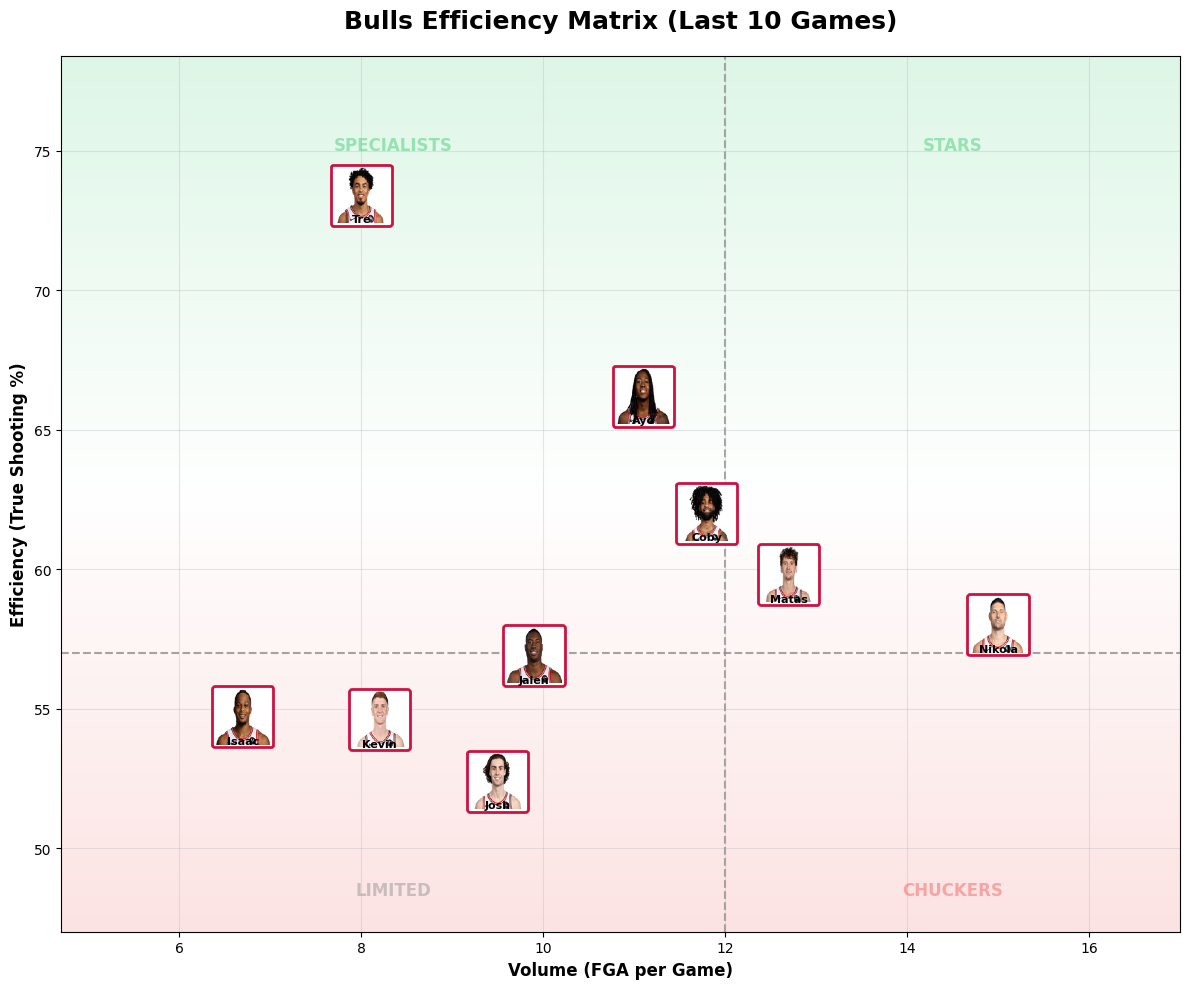

In [4]:
fig = viz.efficiency_matrix(
    roster,
    title="Bulls Efficiency Matrix (Last 10 Games)",
    league_avg_ts=57.0,   # League average True Shooting %
    league_avg_fga=12.0,  # League average FGA per game
    show_gradient=True,
    show_names=True,
)
plt.show()

## Save to File

Saved to ../output/efficiency_matrix.png


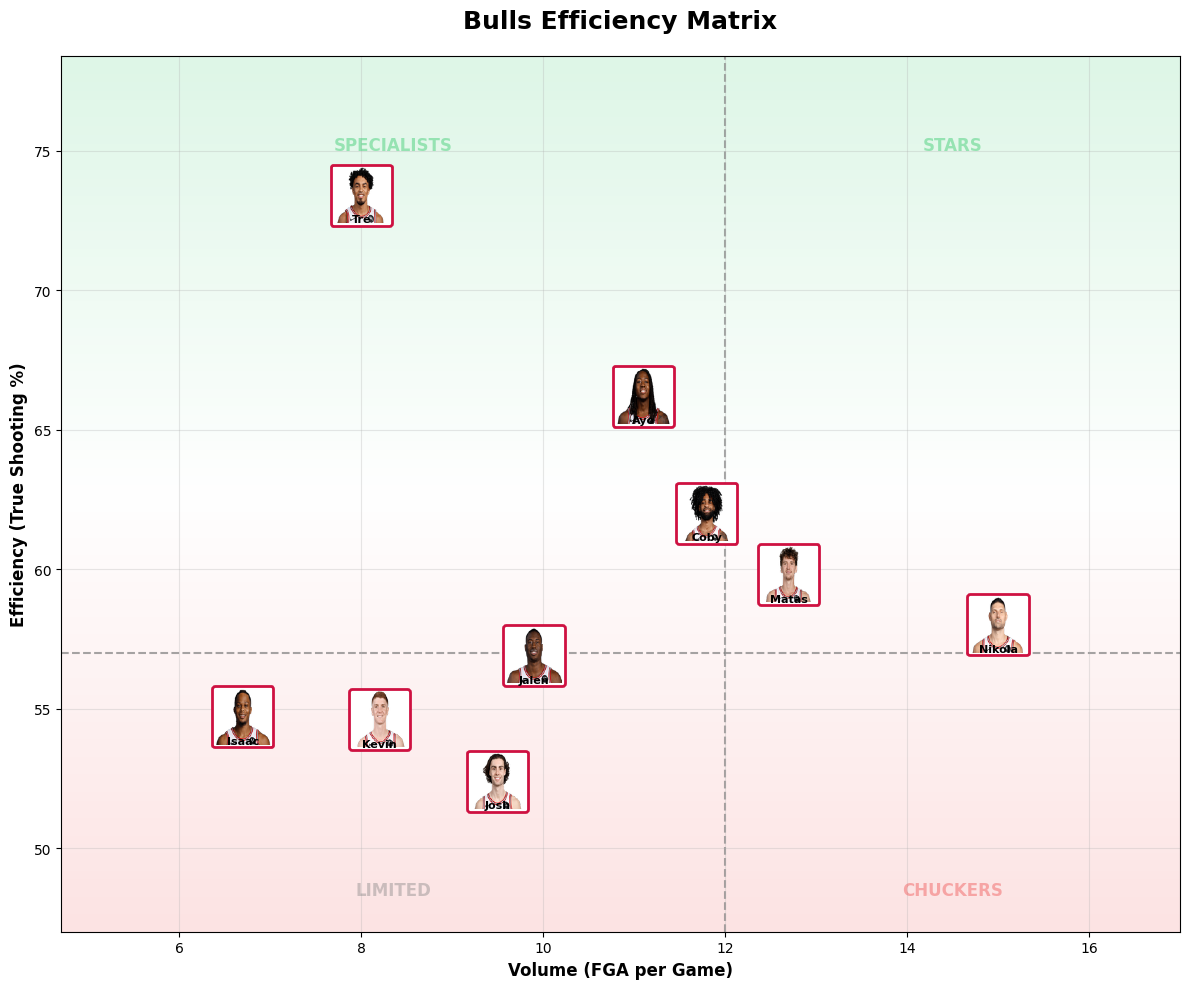

In [5]:
fig = viz.efficiency_matrix(
    roster,
    title="Bulls Efficiency Matrix",
    save_path="../output/efficiency_matrix.png",
)

## Customization Options

Try different settings:

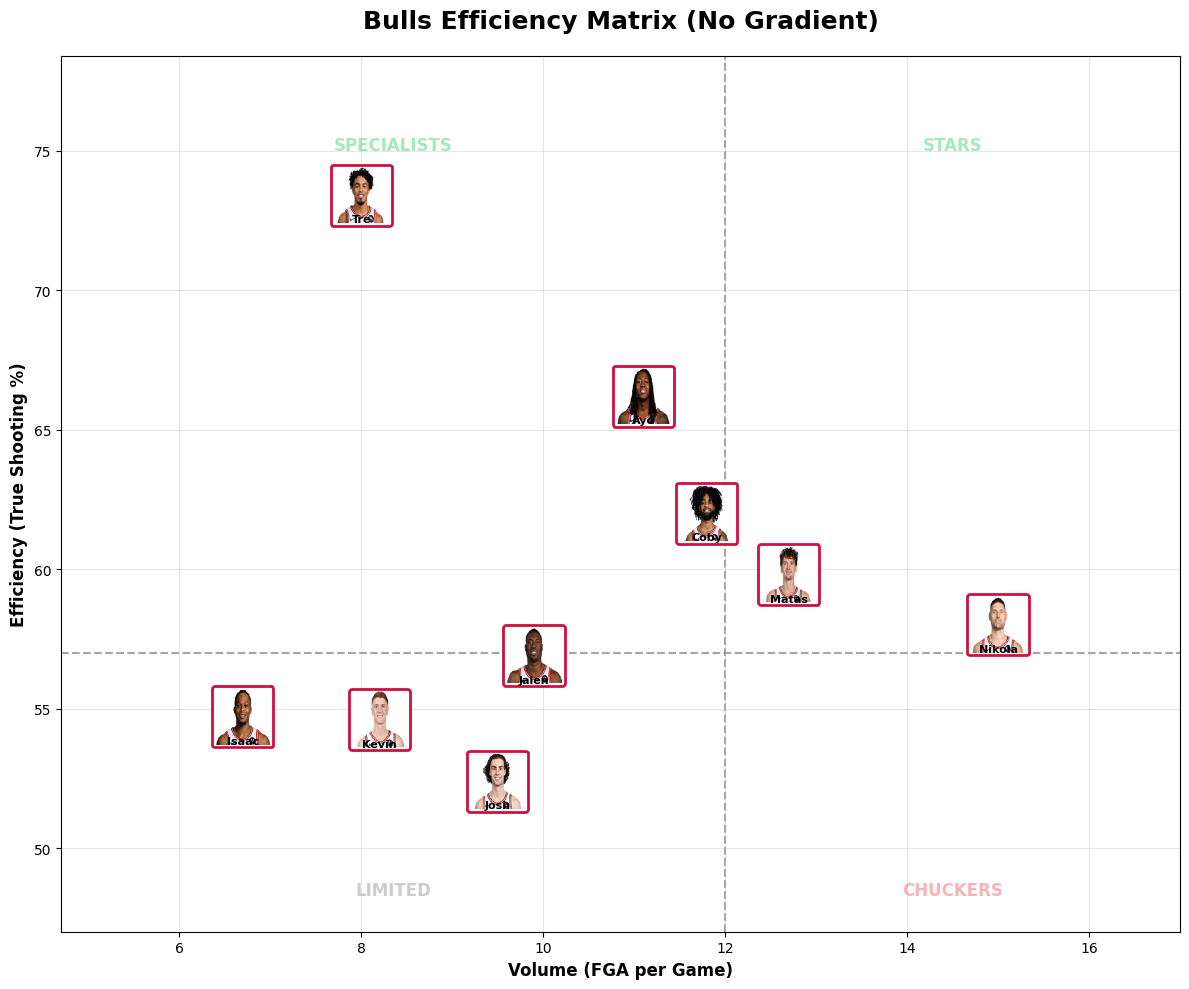

In [6]:
# Without gradient background
fig = viz.efficiency_matrix(
    roster,
    title="Bulls Efficiency Matrix (No Gradient)",
    show_gradient=False,
)
plt.show()

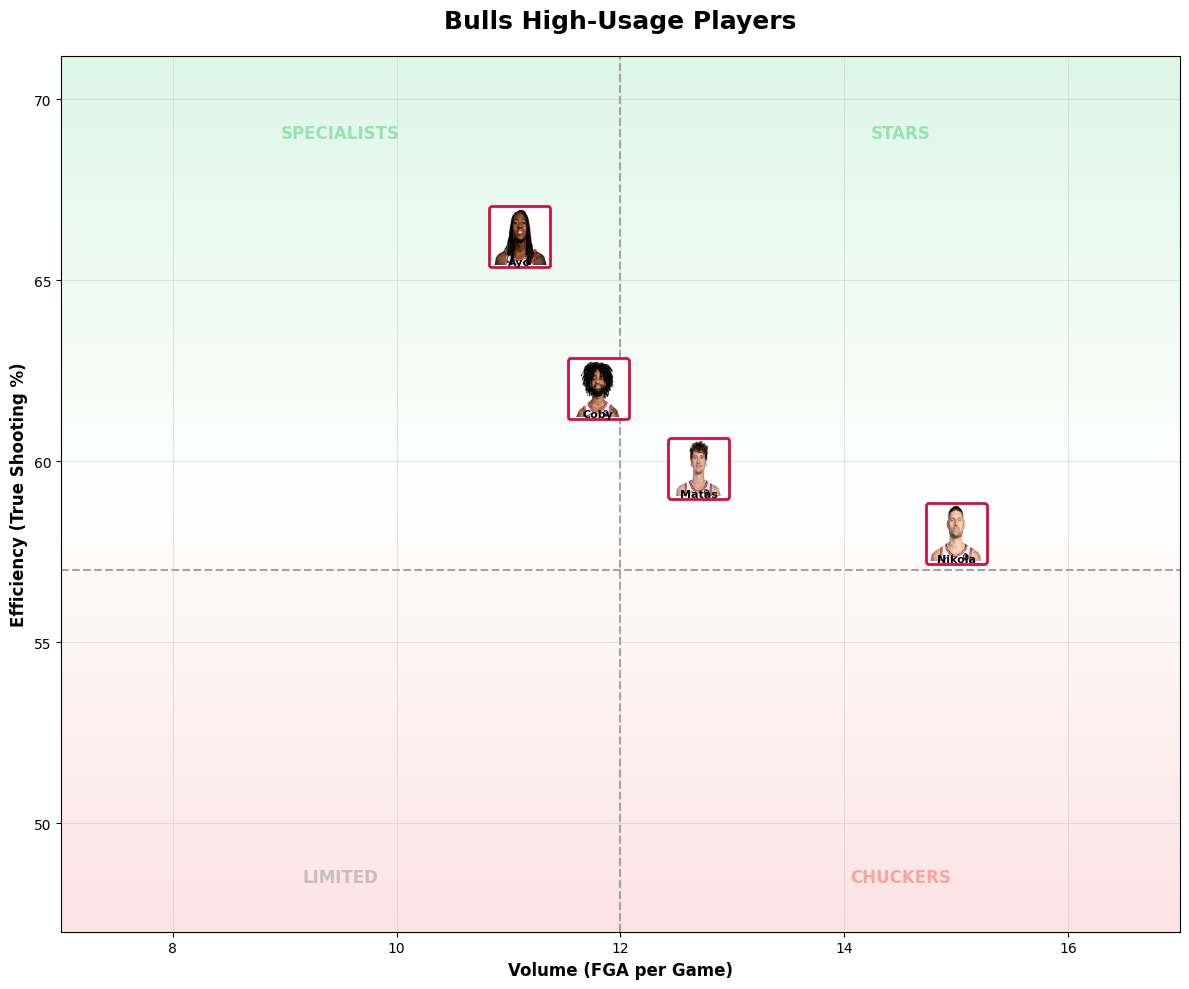

In [7]:
# With stricter volume filter (only high-usage players)
high_usage = data.get_roster_efficiency(last_n_games=10, min_fga=10.0)

fig = viz.efficiency_matrix(
    high_usage,
    title="Bulls High-Usage Players",
)
plt.show()

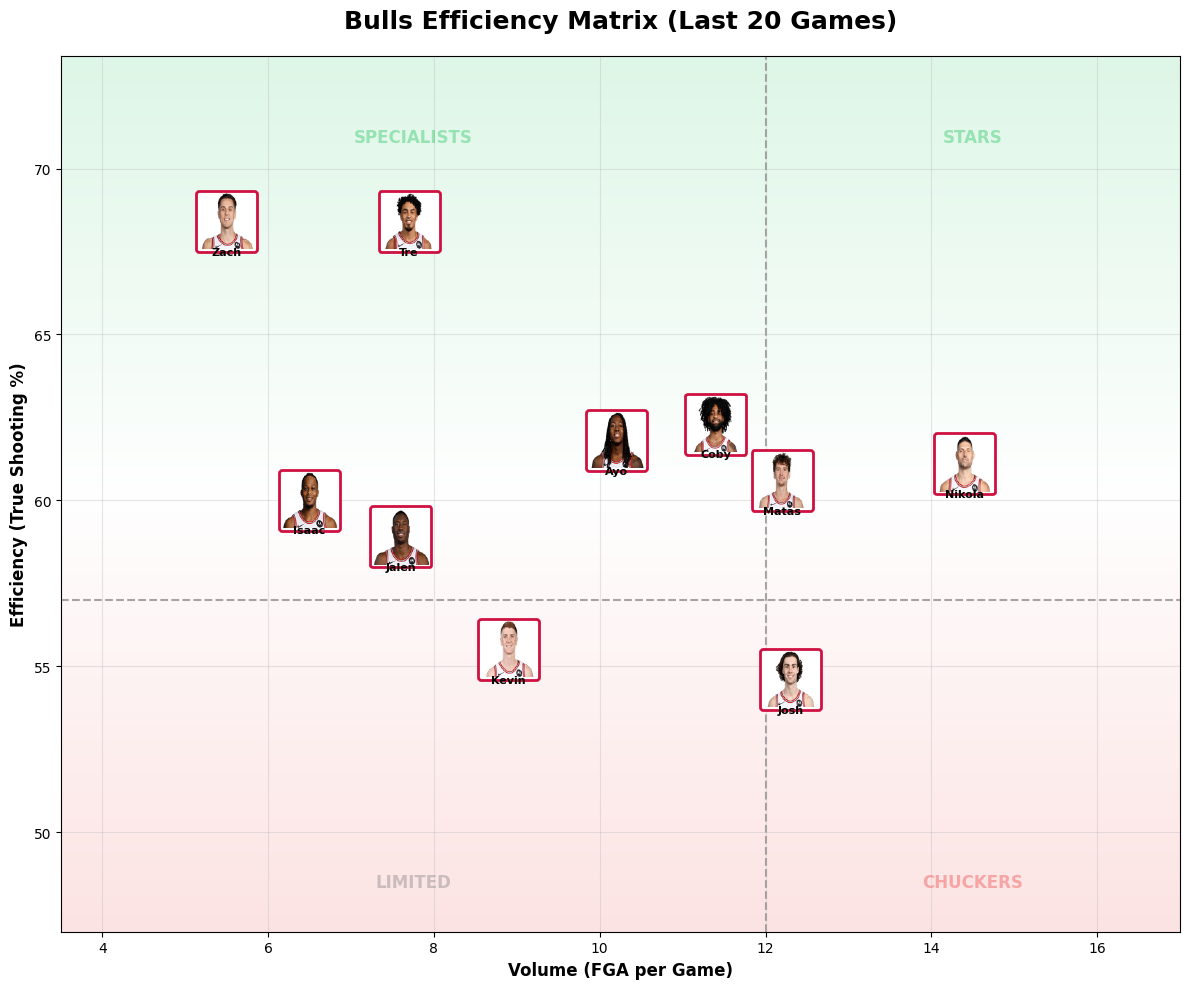

In [8]:
# Longer sample size (last 20 games)
roster_20 = data.get_roster_efficiency(last_n_games=20, min_fga=5.0)

fig = viz.efficiency_matrix(
    roster_20,
    title="Bulls Efficiency Matrix (Last 20 Games)",
)
plt.show()